In [1]:


import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from keras import datasets, layers, models
import tensorflow as tf
print(tf.__version__)



2023-02-07 19:39:49.899710: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-07 19:39:49.992385: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-07 19:39:49.992400: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-07 19:39:50.465062: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

2.11.0


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

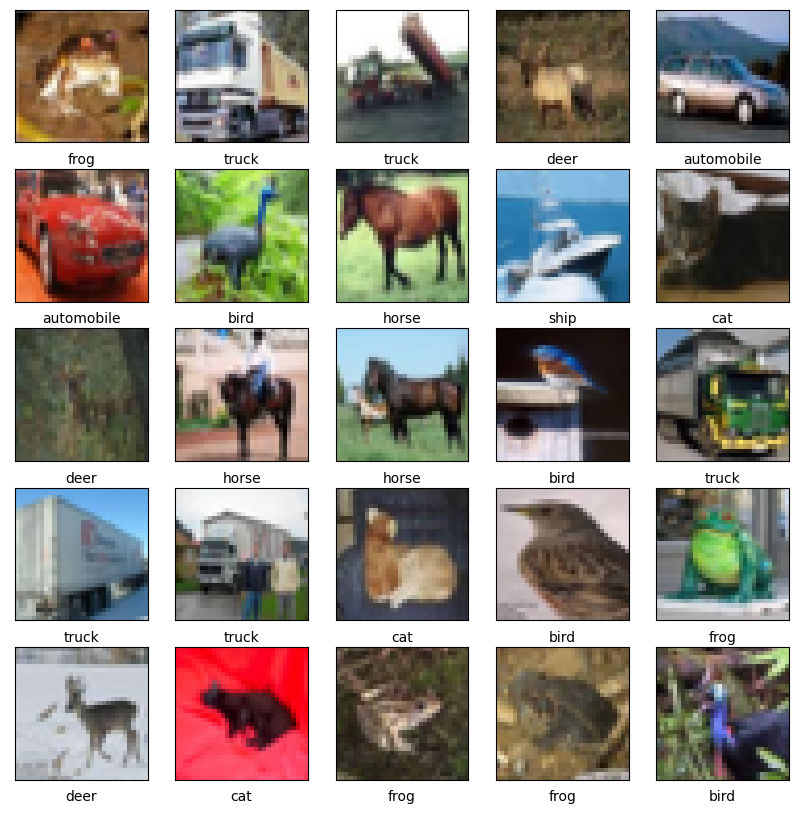

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [4]:


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))



2023-02-07 19:39:52.841162: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-07 19:39:52.841501: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-07 19:39:52.841525: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (davorin-IdeaPad-3): /proc/driver/nvidia/version does not exist
2023-02-07 19:39:52.842339: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5403 - accuracy: 0.4362 - val_loss: 1.2714 - val_accuracy: 0.5391
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1997 - accuracy: 0.5741 - val_loss: 1.1230 - val_accuracy: 0.6016
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0503 - accuracy: 0.6286 - val_loss: 1.0189 - val_accuracy: 0.6440
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9511 - accuracy: 0.6666 - val_loss: 0.9572 - val_accuracy: 0.6655
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8732 - accuracy: 0.6956 - val_loss: 0.9434 - val_accuracy: 0.6696
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8121 - accuracy: 0.7158 - val_loss: 0.9020 - val_accuracy: 0.6867
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7628 - accuracy: 0.7333 - val_loss: 0.9136 -

In [7]:


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)



313/313 - 1s - loss: 0.8804 - accuracy: 0.7033 - 1s/epoch - 3ms/step


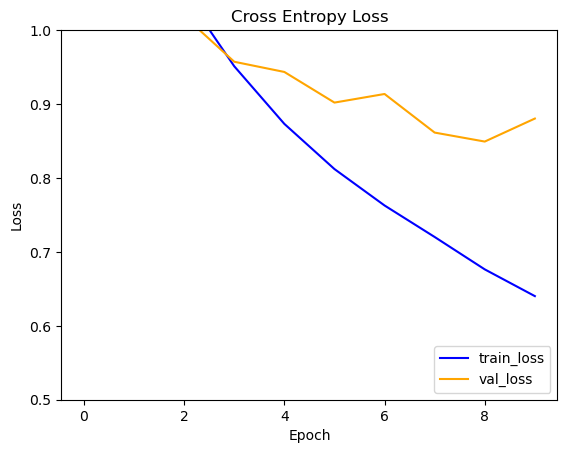

In [8]:
 plt.plot(1)
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train_loss')
 plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
 # plot accuracy
    
 #plt.subplot(212)
 ##plt.title('Classification Accuracy')
 #plt.plot(history.history['accuracy'], color='blue', label='train')
 #plt.plot(history.history['val_accuracy'], color='orange', label='test')

2023-02-07 19:42:35.716650: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1152000000 exceeds 10% of free system memory.
2023-02-07 19:42:35.915179: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1152000000 exceeds 10% of free system memory.
2023-02-07 19:42:36.117283: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1152000000 exceeds 10% of free system memory.
2023-02-07 19:42:37.199467: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1152000000 exceeds 10% of free system memory.
2023-02-07 19:42:37.349863: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1152000000 exceeds 10% of free system memory.


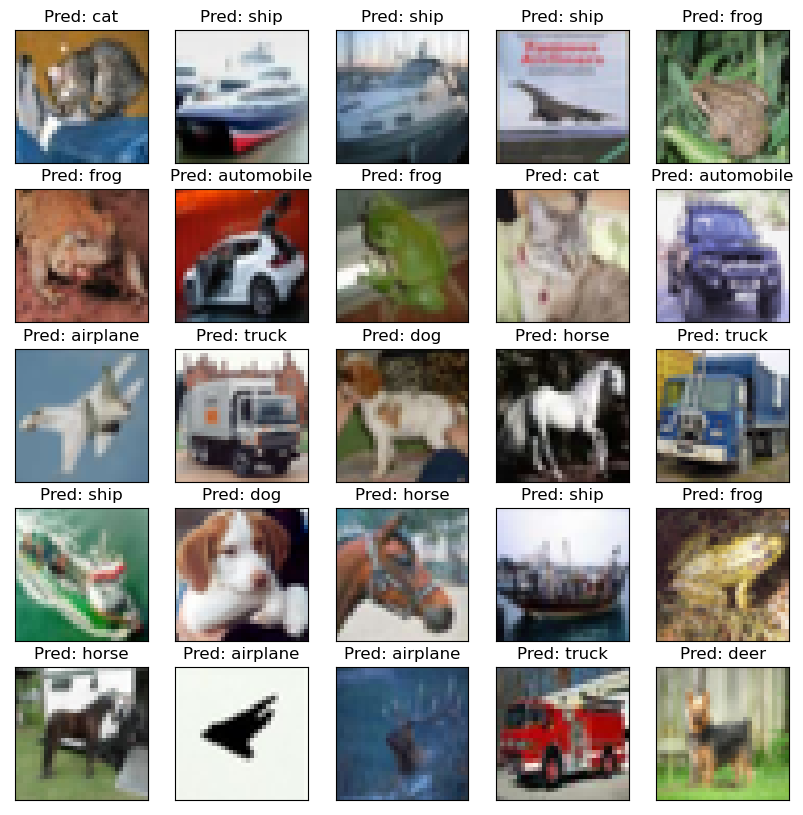

In [9]:
plt.figure(figsize=(10,10))

for i in range(25):
    classifications = model(test_images)

    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = np.argmax(classifications[i])
    plt.title("Pred: " + class_names[index])

In [20]:


cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [21]:


y_train = y_train.flatten()
y_test = y_test.flatten()



In [22]:


input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0



In [23]:


y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)



In [25]:




# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)




313/313 [==============================] - 1s 3ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

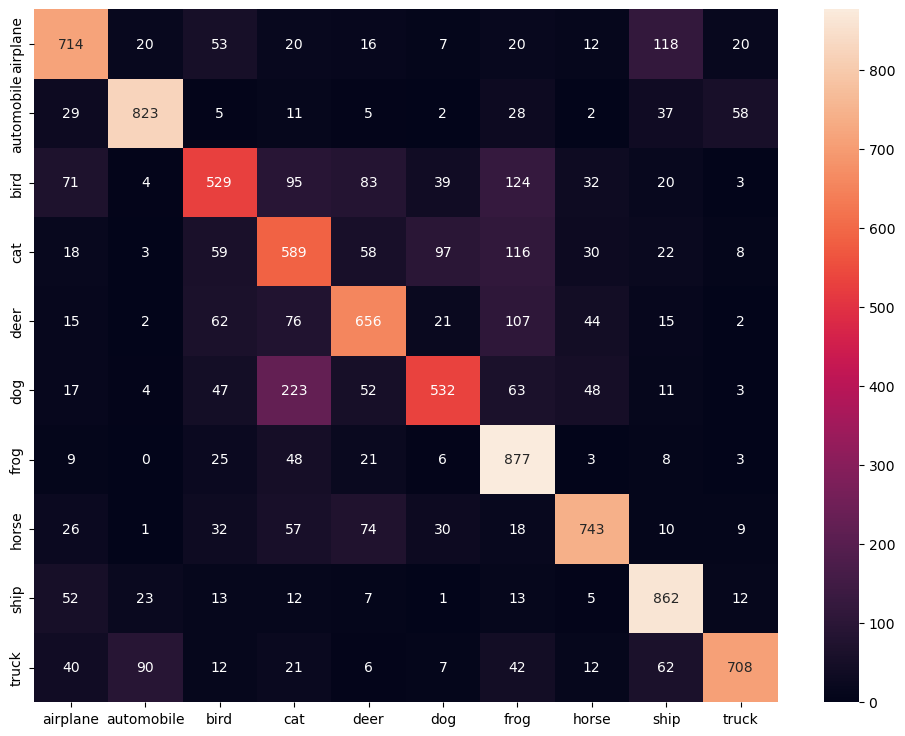

In [26]:


plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=class_names, yticklabels=class_names)

